# BUSINESS PROBLEM SETTING

This case study delves into the performance of acquisition channels for an online retailer specializing in consumer electronics. The goal is to identify patterns that guide decisions on where to allocate additional resources and where to cut back. In the vast landscape of marketing channels available to brands for reaching their customer prospects and conveying messages, it becomes imperative to evaluate which channels yield higher conversion rates, incur lower costs, and generate the most revenue.

The primary objective of this analysis is to extract valuable insights into the performance of each acquisition channel. By doing so, it aims to inform strategic decisions related to budgeting and customer targeting. The focus is on gaining a nuanced understanding of the effectiveness of each channel, facilitating informed and optimized resource allocation for enhanced overall performance

In [40]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# DATA UNDERSTANDING

In [2]:
data = pd.read_csv('customer_acquisition_data.csv')

In [3]:
data.head()

,customer_id,channel,cost,conversion_rate,revenue
0,1,referral,8.320327,0.123145,4199
1,2,paid advertising,30.450327,0.016341,3410
2,3,email marketing,5.246263,0.043822,3164
3,4,social media,9.546326,0.167592,1520
4,5,referral,8.320327,0.123145,2419


In [4]:
data.shape

(800, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      800 non-null    int64  
 1   channel          800 non-null    object 
 2   cost             800 non-null    float64
 3   conversion_rate  800 non-null    float64
 4   revenue          800 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 31.4+ KB


In [7]:
# Statistics summary (mean, min, max) of numerical variables (cost, coversion rate, revenue)
data.drop(columns = {"customer_id"}).describe()

,cost,conversion_rate,revenue
count,800.000000,800.000000,800.000000
mean,13.148052,0.086305,2769.151250
std,9.922337,0.059611,1259.543706
min,5.246263,0.016341,500.000000
25%,5.246263,0.043822,1694.000000
50%,8.320327,0.043822,2764.000000
75%,9.546326,0.123145,3824.250000
max,30.450327,0.167592,4998.000000


In [11]:
# Correlation table of 3 numerical variables
data.drop(columns = "customer_id").set_index('channel').corr()

,cost,conversion_rate,revenue
cost,1.000000,-0.537430,0.018642
conversion_rate,-0.537430,1.000000,-0.050456
revenue,0.018642,-0.050456,1.000000


In [10]:
# Explore the category of MKT channels in this dataset
list(data['channel'].unique())

['referral', 'paid advertising', 'email marketing', 'social media']

# EXPLORATORY DATA ANALYSIS: UNDERSTANDING PERFORMANCE OF EACH MKT CHANNEL

## Numeric data distribution of cost, conversion rate and revenue

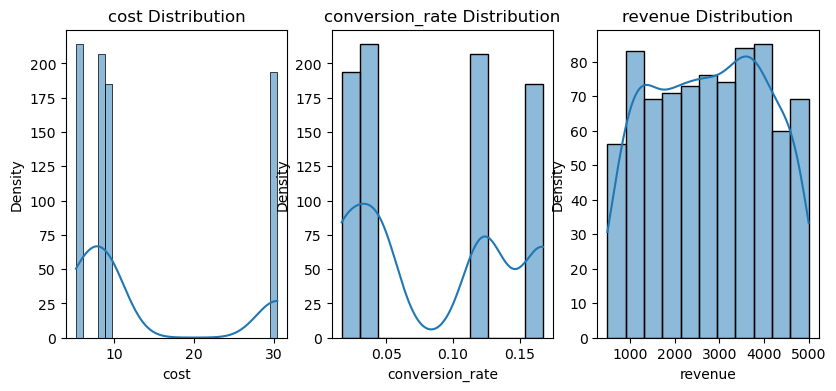

In [15]:
numerical_features = ['cost', 'conversion_rate', 'revenue']
plt.figure(figsize=(20, 4))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, 6, i)
    sns.histplot(data=data, x=feature, kde=True)
    plt.title(f'{feature} Distribution')
    plt.xlabel(feature)
    plt.ylabel('Density')


There doesn't seem to have any patterns in the data distribution of values of cost, conversion rate and revenue. One hypothesis is that the data is quite limited to form any clear distribution (normal or skewed distributions).

## Revenue percentage by channel

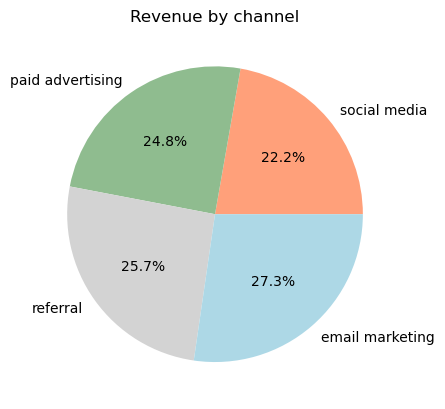

In [31]:
# revenue percentage by channel
channel_revenue = data.groupby('channel')['revenue'].sum()
channel_revenue = channel_revenue.sort_values()  # Sort the values in ascending order
channel_revenue.plot.pie(colors=["lightsalmon", 'darkseagreen', 'lightgrey', 'lightblue'], autopct='%1.1f%%')
plt.title('Revenue by channel')
plt.ylabel('');


Email marketing is the highest revenue-contributing channel, accounting for 27.3% of the total revenue, while social media contributes the least, representing 22.2% of the total revenue. Since the differences in percentage are relatively small, it is difficult to draw definitive conclusions about the performance of individual channels in comparison to one another.

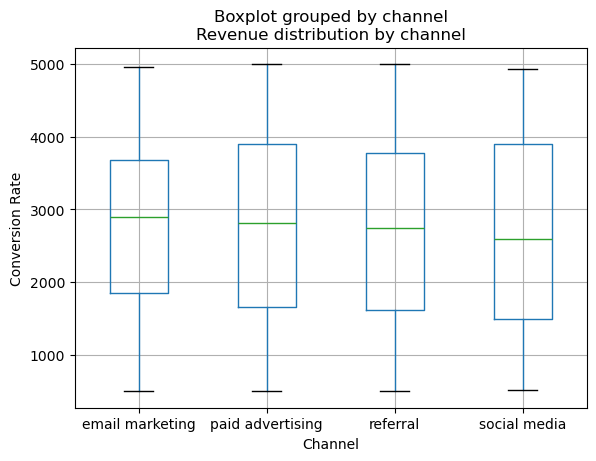

In [32]:
data.boxplot(column='revenue', by='channel')
plt.xlabel('Channel')
plt.ylabel('Conversion Rate')
plt.title('Revenue distribution by channel')
plt.show()

This boxplot provides a different angle at the revenue by channel. Despite email marketing contributing the least to the total revenue, it exhibits higher values for the first quartile, mean (second quartile), and third quartile compared to the referral and social media channels in the revenue data points.

## Cost per acquisition (CAC) by marketing channel

Rather than solely focusing on cost metrics, our analysis will delve into the Cost Per Acquisition (CAC) to obtain a more comprehensive understanding of the cost-effectiveness of each channel. The formula employed for calculating CAC is:

**Customer Acquisition Cost (CAC) = Total Cost/Total Customers Acquired**

This simplified CAC formula assumes that the cost column includes all associated expenses related to customer acquisition, encompassing tools, salaries, advertising spend, and more.

In [33]:
#calculate cost per acquisition (average cost to acquire each customer) for each channel 
cac=round((data.groupby('channel')['cost'].sum())/(data.groupby('channel')['customer_id'].count()),2)
cac_df=pd.DataFrame({'Channel':cac.index,'CAC':cac.values})
cac_df

,Channel,CAC
0,email marketing,5.25
1,paid advertising,30.45
2,referral,8.32
3,social media,9.55


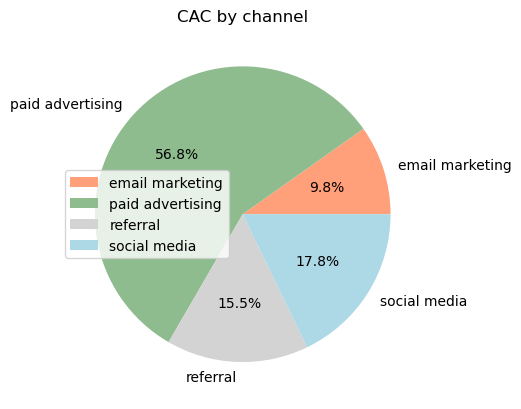

In [35]:
# visualise CAC by channel
cac_df.plot.pie(y='CAC', labels=cac_df['Channel'], colors=["lightsalmon", 'darkseagreen', 'lightgrey', 'lightblue'], autopct='%1.1f%%')
plt.title('CAC by channel')
plt.ylabel('');


It is obvious that **Paid marketing**'s CAC is the highest

## Conversion rate by marketing channel

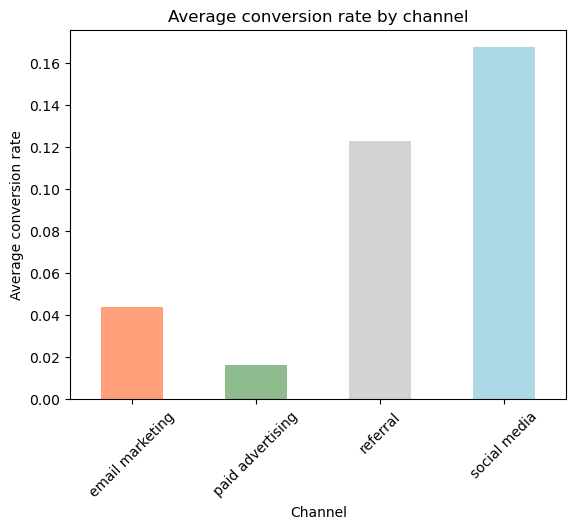

In [37]:
#Group average conversion rate by channel 
con_data=data.groupby('channel')['conversion_rate'].mean()
con_data.plot.bar (x='channel', y='conversion_rate', color=["lightsalmon", 'darkseagreen', 'lightgrey', 'lightblue'])
plt.xlabel('Channel')
plt.xticks(fontsize=10, rotation=45)
plt.ylabel('Average conversion rate')
plt.yticks(fontsize=10)
plt.title('Average conversion rate by channel');

**Social Media:**
* Boasts the highest conversion rates, surpassing an average rate of 0.16. This channel drove the highest revenue and accounted for only moderate MKT spend.

**Paid Advertising:**
* Represents the lowest conversion performance, falling below an average rate of 0.02. This channel contributed the lowest revenue. Hypothesis: Is marketing spending efficient if we continue to invest in this channel?

**Insights:**
* Identifying the acquisition channel that attracts engaged and converting customers is crucial.
* Similar behaviors and affinity patterns among customers from each marketing channel emphasize the importance of strategic allocation of marketing resources and efforts for businesses.

## Return on investment by marketing channel

In [38]:
#calculate roi (return on investment) for each channel
roi=round((data.groupby('channel')['revenue'].sum()-data.groupby('channel')['cost'].sum())/data.groupby('channel')['cost'].sum()*100,2)
roi_df=pd.DataFrame({'Channel': roi.index, 'ROI': roi.values})
roi_df

,Channel,ROI
0,email marketing,53761.75
1,paid advertising,9183.26
2,referral,32969.12
3,social media,27796.23


Return on Investment (ROI) quantifies the performance of each marketing channel in terms of revenue and profit growth. The following formula calculates the ROI for each channel:

**ROI = (Total Revenue−Total CostTotal Cost)/(Total Cost)×100%

Comparing the ROI metric among marketing channels helps assess which channel demonstrates greater efficiency in marketing spend. 
* **Paid advertising**, with the **highest Customer Acquisition Cost (CAC)** and the **lowest return on investment**, suggests a need for budget cuts or adjustments to bidding and targeting strategies. For instance, refocusing paid ads on retargeting prospects who (1) have spent a certain duration on the website , or (2) interacted with specific products can reduce costs and increase potential revenue by targeting individuals with higher purchase intent.

* **Email marketing** has the highest ROI, investing in this channel has proven successful. This indicates an opportunity to increase investments, execute more tailored campaigns, and implement engagement strategies to captivate and nurture both cold leads and existing customers.

* **Referral marketing** also holds potential with a decent ROI and low CAC. Exploring experimentation ideas, such as doubling referral rewards for a month, can be effective. Additionally, promoting the referral campaign more actively among the existing customer base can enhance its visibility.

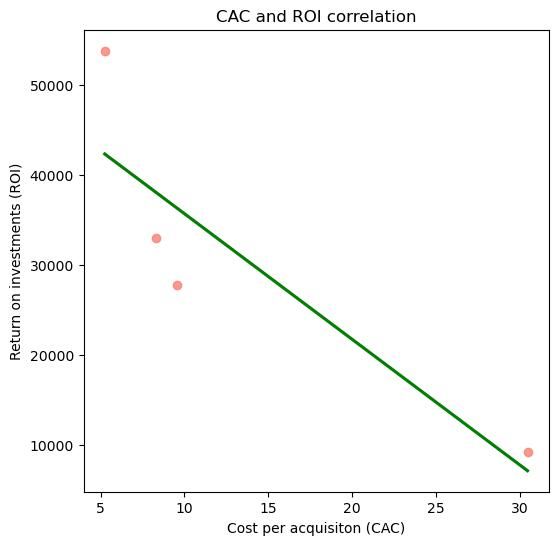

In [39]:
#plot the correlation of CAC and ROI
plt.figure(figsize=(6, 6))
sns.regplot(x=cac, y=roi, ci=None, scatter_kws={'color': 'salmon'}, line_kws={'color': 'green'})
plt.xlabel('Cost per acquisiton (CAC)')
plt.ylabel('Return on investments (ROI)')
plt.title('CAC and ROI correlation');

A negative correlation exists between the cost per acquisition (CAC) and return on investment (ROI) by channel. When CAC is higher, ROI tends to be lower. Simply increasing the budget does not mean a better investment performance. It is crucial to refine our current marketing strategies to be more targeted and strategic. With our current methods of allocating marketing budgets and acquiring customers, we are not optimizing our spending efficiently.

## MARKETING CHANNEL PROFITABILITY ANALYSIS SUMMARY

A comprehensive analysis of cost, conversion, revenue by channel, along with additional metrics of CAC and ROI, has illuminated the profitability of each channel. This deeper exploration provides insights into channels that are more lucrative, warranting consideration for increased marketing budget and efforts. Key takeaways from the analysis include:

* **Email Marketing**:
    * Boasts the highest ROI and lowest CAC.
    * Suggests opportunities for increased spending investments and the implementation of more tailored CRM campaigns.


* **Paid Advertising**:
    * Exhibits the lowest ROI and the highest CAC.
    * Indicates a need for budget reduction or significant strategy adjustments.


* **Budget considerations**:
    * Highlighting that simply increasing the budget does not guarantee improved investment performance.
    * Emphasizes the necessity for a review of current spending and marketing strategies to ensure efficient use of marketing resources.